In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist

#Loads the mnist dataset
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
#printing the number of Samples, Labels in datasets

print('Initial shape or dimension of X_train',str(x_train.shape))

print('number of samples in our training data',str(len(x_train)))
print('number of samples in our test data',str(len(x_test)))

print('number of labels in our training data',str(len(y_train)))
print('number of labels in our test data',str(len(y_test)))

Initial shape or dimension of X_train (60000, 28, 28)
number of samples in our training data 60000
number of samples in our test data 10000
number of labels in our training data 60000
number of labels in our test data 10000


In [32]:
y_train


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

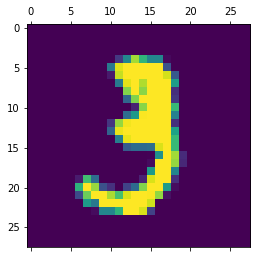

In [33]:
plt.matshow(x_train[10])

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dense,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [25]:
model = Sequential()

model.add(Conv2D(64, (3,3) , input_shape = (28,28,1),activation = 'relu'))     #Input Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))
          
model.add(Conv2D(64, (3,3) , activation='relu'))      #Hidden Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2)) 
model.add(Dropout(0.1))

model.add(Conv2D(80, (3,3) , activation='relu'))      #Hidden Layer
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(100, activation = 'relu'))
model.add(Dropout(0.1))

model.add(Dense(50, activation = 'relu'))
model.add(Dropout(0.1))  

model.add(Dense(10, activation = 'softmax'))  #Output Layer

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 batch_normalization_7 (Batc  (None, 26, 26, 64)       256       
 hNormalization)                                                 
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 batch_normalization_8 (Batc  (None, 11, 11, 64)      

In [26]:
history = model.fit(x_train , y_train , validation_split=(0.1) , epochs=10)

Epoch 1/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2250 - accuracy: 0.9313 - val_loss: 0.0536 - val_accuracy: 0.9827
Epoch 2/10
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0902 - accuracy: 0.9726 - val_loss: 0.0455 - val_accuracy: 0.9873
Epoch 3/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0682 - accuracy: 0.9790 - val_loss: 0.0417 - val_accuracy: 0.9878
Epoch 4/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0580 - accuracy: 0.9825 - val_loss: 0.0437 - val_accuracy: 0.9885
Epoch 5/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0512 - accuracy: 0.9846 - val_loss: 0.0446 - val_accuracy: 0.9880
Epoch 6/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0449 - accuracy: 0.9860 - val_loss: 0.0376 - val_accuracy: 0.9893
Epoch 7/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0402 - accuracy: 0.9877 - val_loss: 0.0430 - val_accuracy:

In [27]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0413 - accuracy: 0.9889


[0.04128487408161163, 0.9889000058174133]

In [28]:
predictions = np.argmax(model.predict(x_test),axis = 1)
predictions

array([7, 2, 1, ..., 4, 5, 6])

In [29]:
from sklearn.metrics import accuracy_score,confusion_matrix ,classification_report
cm=confusion_matrix(y_test,predictions)
print(cm)
print(accuracy_score(y_test,predictions))

[[ 960    0    5    0    0    1    3    9    1    1]
 [   0 1129    1    1    0    0    1    3    0    0]
 [   0    0 1021    0    0    0    0   11    0    0]
 [   0    0    1  997    0    8    0    3    1    0]
 [   0    0    0    0  975    0    2    0    0    5]
 [   3    0    0    3    0  884    1    1    0    0]
 [   2    3    1    0    1    4  947    0    0    0]
 [   0    2    5    1    0    1    0 1019    0    0]
 [   0    1    0    1    1    2    0    0  964    5]
 [   2    1    0    0    4    4    0    4    1  993]]
0.9889


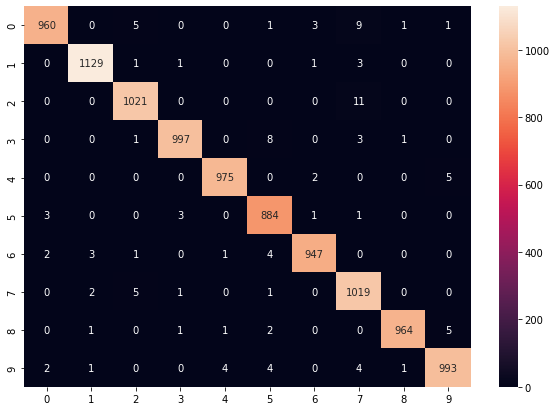

In [30]:
import seaborn as sns

fig = plt.figure(figsize=(10,7))
confusion_matrix = cm
sns.heatmap(confusion_matrix,annot = True,fmt = 'd')

In [31]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       967
           1       0.99      0.99      0.99      1136
           2       0.99      0.99      0.99      1034
           3       0.99      0.99      0.99      1003
           4       0.99      0.99      0.99       981
           5       0.99      0.98      0.98       904
           6       0.99      0.99      0.99       954
           7       0.99      0.97      0.98      1050
           8       0.99      1.00      0.99       967
           9       0.98      0.99      0.99      1004

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000

